# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Luthfi Aji Wicaksono
- Email: luthfi.ajiw@gmail.com
- Id Dicoding: lihat dimana ya?

## Menentukan Pertanyaan Bisnis

- Pada musim apa sepeda paling banyak disewa sepanjang 2011-2012?
- Tentukan preferensi waktu rental user casual dan user terdaftar
- Apakah sepanjang tahun 2011-2012 penyewaan sepeda ini mengalami kenaikan atau penurunan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

## Data Wrangling

### Gathering Data

Data yang akan dipakai adalah data harian karena dianggap sudah cukup menjawab 2 pertanyaan di atas. Di bawah ini data harian rental sepeda dimuat ke dalam data frame.

In [2]:
daily_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Setelah data dimuat selanjutnya kita periksa kualitas dan permasalahan pada data yang ada. Dimulai dari memeriksa kelengkapan data dan tipe data tiap variabelnya.

In [3]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada *missing values* di semua kolom, tetapi variabel `dteday` masih berbentuk objek, nantinya data `dteday` akan dikonversi ke dalam bentuk `datetime`. Selanjutnya kita periksa apakah ada duplikasi data.

In [4]:
print("Jumlah Duplikasi: ", daily_df.duplicated().sum())

Jumlah Duplikasi:  0


Data kita sudah aman dari duplikasi, selanjutnya kita periksa apakah ada *inacccurate values* seperti *outlier* atau tidak.

In [5]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


*Outlier* tampaknya tidak terlihat ada di data ini. Sepertinya beberapa nama kolom perlu diubah supaya lebih mudah untuk dibaca, serta beberapa nilai seperti; temp, atemp, dan lainnya yang perlu dikonversi agar lebih mudah dikenali.

### Cleaning Data

Pertama beberapa nama kolom perlu diganti seperti: `dteday`,`yr`, `mnth` dan `cnt`.

In [6]:
daily_df.rename(columns={
  'dteday': 'date',
  'yr': 'year',
  'mnth': 'month',
  'cnt': 'count'
}, inplace=True)
daily_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Selanjutnya kita konversi ulang data seperti: `temp`, `atemp`, `hum` dan `windspeed` dan mengonversi tipe data date dari object menjadi `datetime`.

In [7]:
# Konversi temp ke dalam bentuk Celcius
daily_df["temp"] = daily_df["temp"].apply(lambda x: x * 41)
# Konversi atemp ke dalam bentuk Celcius
daily_df["atemp"] = daily_df["atemp"].apply(lambda x: x * 50)

daily_df["hum"] = daily_df["hum"].apply(lambda x: x * 100)
daily_df["windspeed"] = daily_df["windspeed"].apply(lambda x: x * 67)

daily_df["date"] = pd.to_datetime(daily_df["date"])

daily_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis (EDA)

**Eksplorasi Data Musim**

Pada eksplorasi ini kita mencari tahu tentang jumlah keseluruhan pengguna yang menyewa sepeda pada tiap musimnya.

In [8]:
daily_df.groupby('season').agg({
  'count': 'sum'
})

,count
season,
1,471348
2,918589
3,1061129
4,841613


Pada pivot table di atas didapati bahwa pada musim:
- **Spring** terdapat **471,348** yang disewa
- **Summer** terdapat **918,589** yang disewa
- **Fall** terdapat **1,061,129** yang disewa
- **Winter** terdapat **841,613** yang disewa

**Eksplorasi Preferensi Waktu Sewa**

Mari kita cari tahu preferensi waktu sewa pengguna pada `workingday` dan `holiday`.

In [9]:
daily_df["workingday"] = daily_df["workingday"].apply(lambda x: "On Workingday" if x == 1 else "Not on Workingday")
daily_df.groupby(by='workingday').agg({
  'casual': 'sum',
  'registered': 'sum',
})

,casual,registered
workingday,,
Not on Workingday,316732,683537
On Workingday,303285,1989125


Dari situ diketahui bahwa:
- Pengguna **casual** lebih banyak menyewa pada hari libur/weekend
- Sedangkan pengguna **terdaftar** lebih banyak menyewa pada hari kerja

In [10]:
daily_df["holiday"] = daily_df["holiday"].apply(lambda x: "On Holiday" if x == 1 else "Not on Holiday")
daily_df.groupby(by='holiday').agg({
  'casual': 'sum',
  'registered': 'sum'
})

,casual,registered
holiday,,
Not on Holiday,597658,2616586
On Holiday,22359,56076


Dari situ diketahui bahwa penggguna casual dan terdaftar menyewa sepeda lebih banyak pada hari biasa bukan hari libur.

**Eksplorasi Jumlah Sewa**

Disini kita akan mencari tahu jumlah sewa pertahunnya, apakah ada peningkatan pada tahun 2012 atau tidak.

In [11]:
daily_df["year"] = daily_df["year"].apply(lambda x: 2011 if x == 0 else 2012)
daily_df.groupby(by="year").agg({
  'count': 'sum'
})

,count
year,
2011,1243103
2012,2049576


Ternyata memang ada peningkatan jumlah sewa dalam kurun waktu satu tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa sepeda paling banyak disewa sepanjang tahun 2011-2012?

c:\Users\it_20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\it_20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\it_20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


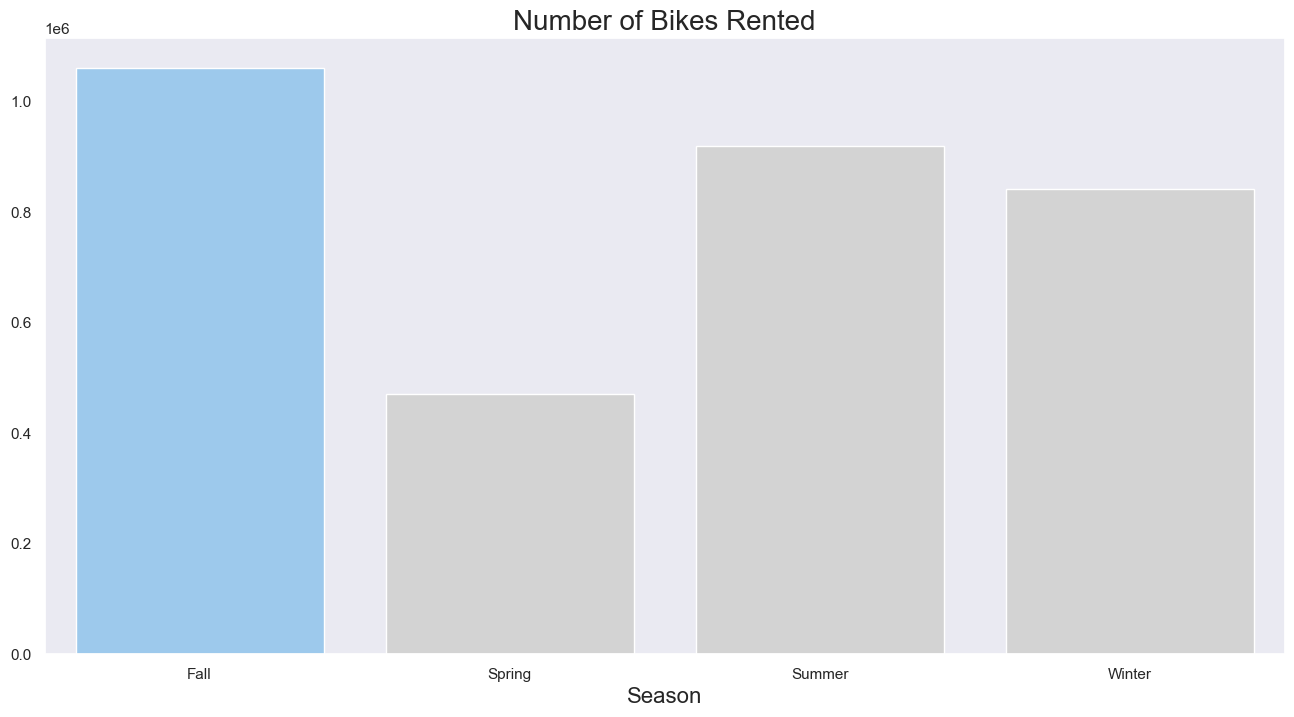

In [12]:
# Kita ubah dulu bentuk data season ke dalam string
def convertSeason(x):
  if x == 1: return "Spring"
  elif x == 2: return "Summer"
  elif x == 3: return "Fall"
  else: return "Winter"

daily_df['season'] = daily_df['season'].apply(lambda x: convertSeason(x))

seasonal_grouped = daily_df.groupby(by='season', as_index=False).agg({
  'count': 'sum'
})

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=seasonal_grouped, x="season", y="count", palette=colors)
ax.set_title("Number of Bikes Rented", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Season", fontsize=16)

plt.show()


### Pertanyaan 2: Tentukan preferensi waktu rental user casual dan user terdaftar

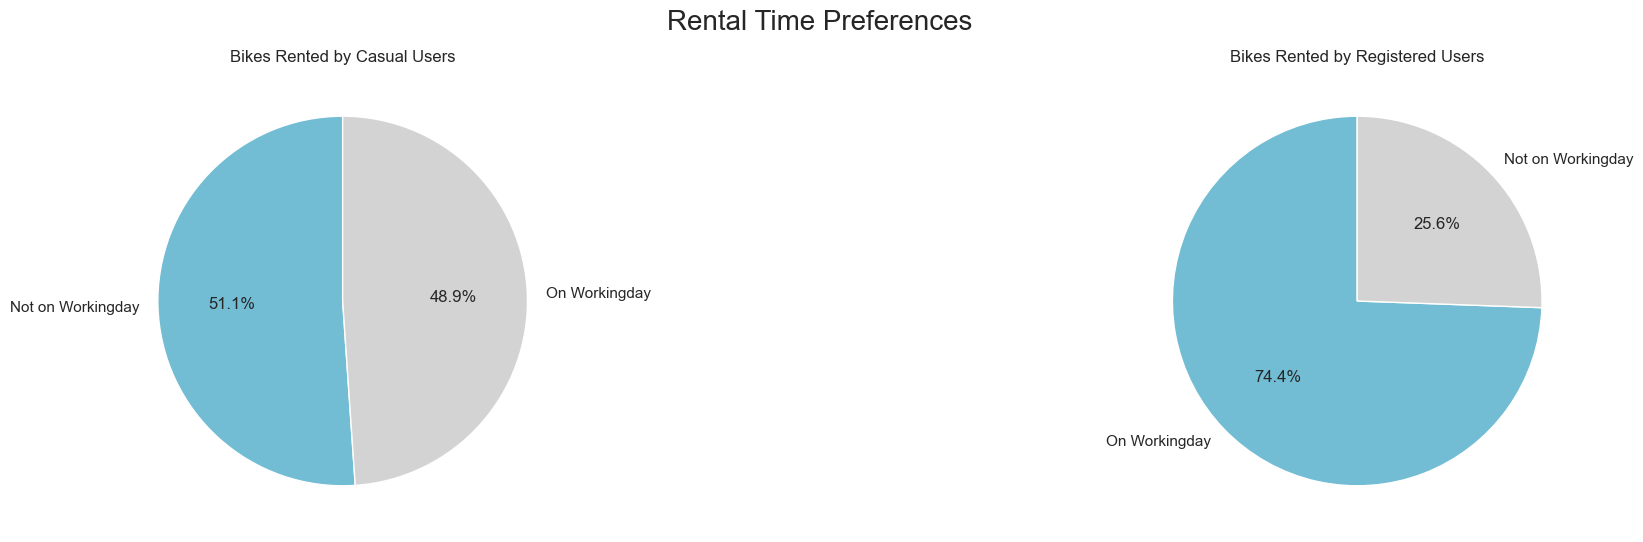

In [19]:
casual_workingday_grouped = daily_df.groupby(by='workingday', as_index=False).agg({
  'casual': 'sum',
}).sort_values(by="casual", ascending=False)
registered_workingday_grouped = daily_df.groupby(by='workingday', as_index=False).agg({
  'registered': 'sum',
}).sort_values(by="registered", ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3"]

ax[0].set_title("Bikes Rented by Casual Users")
ax[0].pie(
  x=casual_workingday_grouped["casual"],
  labels=casual_workingday_grouped["workingday"],
  autopct='%1.1f%%',
  colors=colors,
  startangle=90
)

ax[1].set_title("Bikes Rented by Registered Users")
ax[1].pie(
  x=registered_workingday_grouped["registered"],
  labels=registered_workingday_grouped["workingday"],
  autopct='%1.1f%%',
  colors=colors,
  startangle=90
)

plt.suptitle("Rental Time Preferences", fontsize=20)
plt.show()

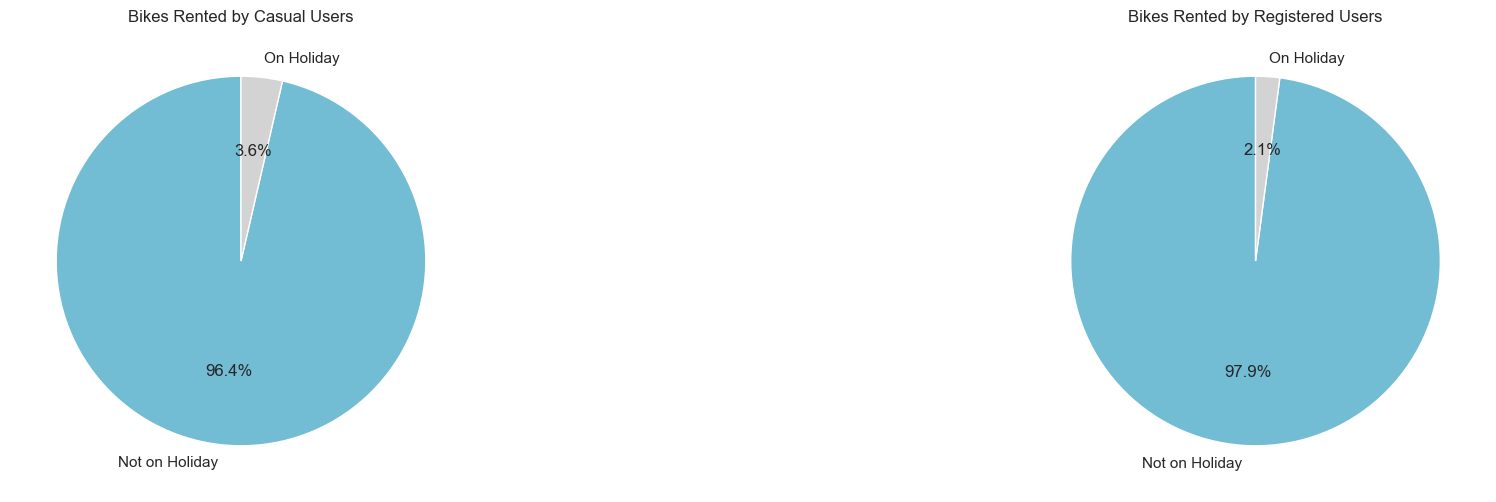

In [14]:
casual_holiday_grouped = daily_df.groupby(by='holiday', as_index=False).agg({
  'casual': 'sum',
}).sort_values(by="casual", ascending=False)
registered_holiday_grouped = daily_df.groupby(by='holiday', as_index=False).agg({
  'registered': 'sum',
}).sort_values(by="registered", ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

ax[0].set_title("Bikes Rented by Casual Users")
ax[0].pie(
  x=casual_holiday_grouped["casual"],
  labels=casual_holiday_grouped["holiday"],
  autopct='%1.1f%%',
  colors=colors,
  startangle=90
)

ax[1].set_title("Bikes Rented by Registered Users")
ax[1].pie(
  x=registered_holiday_grouped["registered"],
  labels=registered_holiday_grouped["holiday"],
  autopct='%1.1f%%',
  colors=colors,
  startangle=90
)
plt.show()

### Pertanyaan 3: Apakah sepanjang tahun 2011-2012 penyewaan sepeda ini mengalami kenaikan atau penurunan?

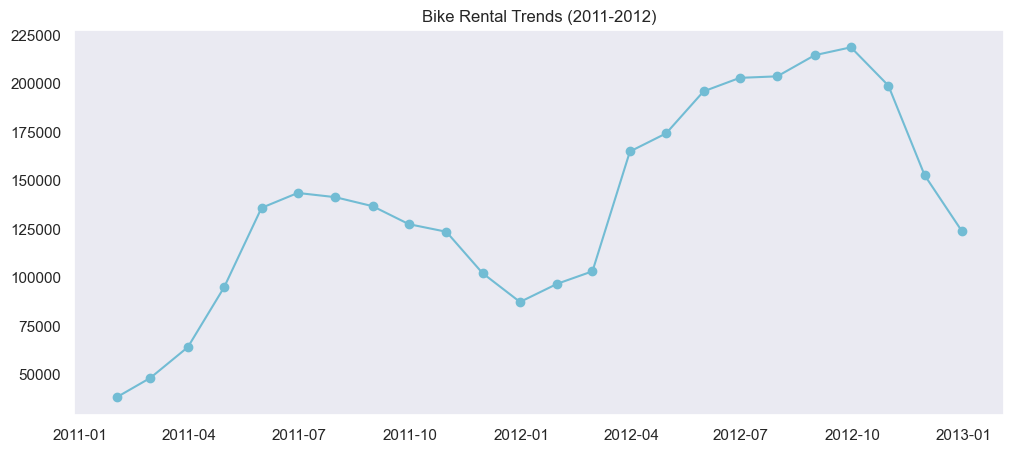

In [15]:
monthly_df = daily_df.resample(rule="M", on="date",).agg({
  'date': 'max',
  'count': 'sum'
})

plt.figure(figsize=(12, 5))
plt.plot(
  monthly_df["date"],
  monthly_df["count"],
  color=colors[0],
  marker='o'
)

plt.title("Bike Rental Trends (2011-2012)")
plt.show()

## Conclusion

**Pada musim apa sepeda paling banyak disewa sepanjang tahun 2011-2012?**

- Bar chart di atas menunjukkan bahwa musim **Fall** adalah musim dengan penyewaan terbanyak diikuti oleh musim **Summer** di urutan kedua.

**Tentukan preferensi waktu rental user casual dan user terdaftar**

- User casual lebih banyak menyewa sepeda pada bukan hari kerja dan pada hari biasa/bukan hari libur
- User terdaftar lebih banyak menyewa sepeda pada hari kerja dan pada hari biasa/bukan hari libur

**Apakah sepanjang tahun 2011-2012 penyewaan sepeda ini mengalami kenaikan atau penurunan?**
- Penyewaan sepeda mengalami kenaikan pada awal kemunculannya di bulan januari 2011 hingga pertengahan 2011 namun mengalami penurunan pada akhir tahun
- Puncaknya penyewaan tertinggi dicetak pada pertengahan tahun 2012 hingga 1/3 akhir 2012, di akhir tahun penyewaan sepeda mengalami penurunan yang signifikan